## Observations and Insights 

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
#visualize the mouse dataset
mouse_metadata.sort_values(by=['Mouse ID'], inplace=True)
mouse_metadata.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
49,a203,Infubinol,Female,20,23
50,a251,Infubinol,Female,21,25
51,a262,Placebo,Female,17,29
52,a275,Ceftamin,Female,20,28
53,a366,Stelasyn,Female,16,29
54,a401,Zoniferol,Female,8,25
33,a411,Ramicane,Male,3,22
44,a444,Ramicane,Female,10,25
55,a457,Ketapril,Female,11,30
56,a492,Stelasyn,Male,20,25


In [3]:
#visualize the study results data set
study_results.head(50).sort_values(['Mouse ID', 'Timepoint'], ascending=[False, True])


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
15,z969,0,45.0,0
37,z581,0,45.0,0
10,z234,0,45.0,0
25,y601,0,45.0,0
12,y260,0,45.0,0
33,y163,0,45.0,0
13,x930,0,45.0,0
20,x336,0,45.0,0
28,w422,0,45.0,0
16,v835,0,45.0,0


In [4]:
# Combine the data into a single dataset

#outer uses union of keys from both frames, merging them on the Mouse ID column 
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview. Sorting first by Mouse ID and then Timepoint both in ascending order

combined_df.head(50).sort_values(['Mouse ID', 'Timepoint'], ascending=[True, True])


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
5,a203,Infubinol,Female,20,23,25,56.793208,1
6,a203,Infubinol,Female,20,23,30,59.523197,1
7,a203,Infubinol,Female,20,23,35,61.931650,2
8,a203,Infubinol,Female,20,23,40,63.593490,2
9,a203,Infubinol,Female,20,23,45,67.973419,2


In [5]:
# Checking the number of mice.

#every since instance of a mouse counted
countmice = combined_df['Mouse ID'].count()

#counts the number of instances of each unique Mouse ID
countmiceuniq = combined_df['Mouse ID'].value_counts()

#counts the number of unique Mouse IDs
finalunique = countmiceuniq.count()

#Prints the solutions
print("Total mice listed: " + str(countmice))
print("Total unique mice listed: " + str(finalunique))



Total mice listed: 1893
Total unique mice listed: 249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#lets you look at all 249 unique mouse IDs
pd.options.display.max_rows = None

#show all of the number of instances of the 249 unique mouse IDs
countmiceuniq.head(249)

#here, we can see that g989 has more instances than any other mouse ID. This may mean it has duplicate time points.



g989    13
v991    10
f345    10
s337    10
w350    10
c758    10
s565    10
c757    10
l897    10
b559    10
w151    10
z969    10
x773    10
a699    10
m269    10
m957    10
j984    10
x402    10
i738    10
t451    10
n304    10
t565    10
m601    10
g791    10
a644    10
a262    10
d251    10
j913    10
a963    10
v923    10
p136    10
g570    10
y478    10
b742    10
a685    10
e227    10
z578    10
a492    10
q787    10
a411    10
t718    10
k862    10
c402    10
t198    10
r811    10
k210    10
i635    10
k894    10
a897    10
i177    10
y163    10
s710    10
k382    10
e476    10
b128    10
l700    10
l661    10
u196    10
r701    10
l733    10
x822    10
j119    10
x401    10
x581    10
a401    10
c832    10
z581    10
k483    10
j755    10
o331    10
u364    10
u327    10
j296    10
i557    10
j365    10
c302    10
l509    10
z795    10
q633    10
e584    10
y793    10
g288    10
j989    10
a203    10
g497    10
s508    10
c766    10
r604    10
i901    10
r944    10
m546    10

In [7]:
#We can examine all instances of the Mouse ID "g989" to see if there are duplicate time points
g989_check = combined_df.loc[combined_df['Mouse ID'] == "g989",:]
print(g989_check)
#we can see that there are duplicate 0, 15, 10, 5, 20 timepoint values for g989

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
586     g989     Propriva  Female          21          26          0   
587     g989     Propriva  Female          21          26          0   
588     g989     Propriva  Female          21          26          5   
589     g989     Propriva  Female          21          26          5   
590     g989     Propriva  Female          21          26         10   
591     g989     Propriva  Female          21          26         10   
592     g989     Propriva  Female          21          26         15   
593     g989     Propriva  Female          21          26         15   
594     g989     Propriva  Female          21          26         20   
595     g989     Propriva  Female          21          26         20   
596     g989     Propriva  Female          21          26         25   
597     g989     Propriva  Female          21          26         30   
598     g989     Propriva  Female          21          26       

In [8]:
#You could also pull all of the duplicated values the following way.
duplicatecheck = combined_df[combined_df[['Mouse ID', 'Timepoint']].duplicated()==True]
#This will print every row where there are duplicate Timepoint data for a Mouse ID
#visual inspection from above is confirmed 
duplicatecheck.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
587,g989,Propriva,Female,21,26,0,45.000000,0
589,g989,Propriva,Female,21,26,5,47.570392,0
591,g989,Propriva,Female,21,26,10,49.880528,0
593,g989,Propriva,Female,21,26,15,53.442020,0
595,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
#dropping duplicate values of Timepoint based on unique Mouse IDs
cleaned_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
5,a203,Infubinol,Female,20,23,25,56.793208,1
6,a203,Infubinol,Female,20,23,30,59.523197,1
7,a203,Infubinol,Female,20,23,35,61.931650,2
8,a203,Infubinol,Female,20,23,40,63.593490,2
9,a203,Infubinol,Female,20,23,45,67.973419,2


In [10]:
#Checking it worked by pulling all of g989's rows. We shouldn't see any duplicate timepoint values
g989_check2 = cleaned_df.loc[cleaned_df['Mouse ID'] == "g989",:]
print(g989_check2)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
586     g989     Propriva  Female          21          26          0   
588     g989     Propriva  Female          21          26          5   
590     g989     Propriva  Female          21          26         10   
592     g989     Propriva  Female          21          26         15   
594     g989     Propriva  Female          21          26         20   
596     g989     Propriva  Female          21          26         25   
597     g989     Propriva  Female          21          26         30   
598     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
586           45.000000                 0  
588           48.786801                 0  
590           51.745156                 0  
592           51.325852                 1  
594           55.326122                 1  
596           56.045564                 1  
597           59.082294                 1  

In [11]:
#you can also check by seeing if there are any duplicate timepoint data for unique mouse IDs the following way.
#because the table is empty, we're in the clear!
duplicatecheck2 = cleaned_df[cleaned_df[['Mouse ID', 'Timepoint']].duplicated()==True]
duplicatecheck2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#this is cleaned_df above

In [13]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.

#every since instance of a mouse counted
countmice2 = cleaned_df['Mouse ID'].count()

#counts the number of instances of each unique Mouse ID
countmiceuniq2 = cleaned_df['Mouse ID'].value_counts()

#counts the number of unique Mouse IDs
finalunique2 = countmiceuniq.count()

#Prints the solutions
print("Total mice listed: " + str(countmice2))
print("Total unique mice listed: " + str(finalunique2))

#should still have 249 unique mice
#we dropped 5 duplicate rows for the timepoint column, so we should have 1888 total rows aka total mice listed


Total mice listed: 1888
Total unique mice listed: 249


## Summary Statistics

In [14]:


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



#group by drug
DrugGroup = cleaned_df.groupby(by='Drug Regimen')
#calculate mean, median, std, SEM, and variance
mean = DrugGroup['Tumor Volume (mm3)'].mean()
median =DrugGroup['Tumor Volume (mm3)'].median()
std = DrugGroup['Tumor Volume (mm3)'].std()
SEM = DrugGroup['Tumor Volume (mm3)'].sem()
#variance is std squared
variance = std ** 2



# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
DrugGroup_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Variance": variance, "Standard Deviation": std, "SEM": SEM})

#print table
DrugGroup_df









,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#snag the drug names and tumor volume columns
newdf = cleaned_df[['Drug Regimen', 'Tumor Volume (mm3)']]

#use agg to calculate mean, median, variance, std, and SEM of tumor volume
newdf.groupby('Drug Regimen').agg(["mean", "median", "var", "std", "sem"]).reset_index()


Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.393463  50.909965  43.138803  6.568014  0.525862
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drugcount_df["counts"] = pd.DataFrame(DrugGroup['Drug Regimen'].count().rename({"Drug Regimen": "counts"}))

#del drugcount_df["Drug Regimen"]



DrugCountBar = drugcount_df.plot(kind= 'bar', color="gray", rot=45, legend=False)
plt.title("Total Data Points")
plt.xlabel('Drug')
plt.ylabel("Number of Data Points")
plt.show()



NameError: name 'drugcount_df' is not defined

In [ ]:
#generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot
xaxis = np.arange(len(drugcount_df))
tick_locations = [value for value in xaxis]

plt.bar(drugcount_df.index.values, drugcount_df["counts"], color="gray")
column_name = ["Drug Regimen"]
plt.xticks(tick_locations, drugcount_df.index.values, rotation=45)
plt.xticks
plt.xlim(-0.75, len(xaxis))
plt.title("Total Data Points")
plt.xlabel('Drug')
plt.ylabel("Number of Data Points")
plt.show()













In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#make sure each unique mouse's gender is only counted once. This keeps only 1 of the Mouse IDs for each unique ID
#This is important because each mouse has a different number of timepoints
onemouse_df = combined_df.drop_duplicates(subset=['Mouse ID'])
unisex =onemouse_df.groupby('Sex')
sexcount_df = pd.DataFrame(unisex['Sex'].count())
colors= ["red", "blue"]
sexcount_df.plot(kind='pie', y='Sex', title= "Distribution of Sexes Across Unique Mice", colors= colors, fontsize=20, autopct="%1.1f%%", shadow=True, startangle=140, legend=False)
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = ["Male","Female"]
plt.rcParams['font.size'] = 20
plt.pie(sexcount_df, labels=sexes, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 12
plt.title("Distribution of Sexes Across Unique Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

maxtimedata = pd.DataFrame(cleaned_df.groupby('Mouse ID')['Timepoint'].max())

#rename the timepoint column to something new
maxtimedata = maxtimedata.rename(columns={'Timepoint': 'Max Timepoint'})
#Do we need to reset index? to google:
    #.sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxtime_df = pd.merge(cleaned_df, maxtimedata, on= 'Mouse ID')
maxtime_df.head()




In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#create an empty list to store the values in the loop
drugloop = []



#loop through the meds listed in the drug list
for med in drug:
    #new df with all of the drug names listed in the drug list, iterating through the list
    newer_df = maxtime_df.loc[maxtime_df['Drug Regimen'] == med]
    #looking at just the drugs in the drug list, and pulling only the rows that are the max timepoint
    finaltime_df = newer_df.loc[newer_df['Timepoint'] == newer_df['Max Timepoint']]
    #The values of the tumor volumes in the df with the max time points for the drugs in the drug list
    tumorval = finaltime_df["Tumor Volume (mm3)"]
    #append the drugloop list with the tumor volume values
    drugloop.append(tumorval)
    
    #quartiles for the tumor volumes
    quartiles = tumorval.quantile([.25,.5,.75])
    #lowest quartile 
    lowerq =quartiles[0.25]
    #highest quartile
    upperq= quartiles[0.75]
    #interquartile range
    IQR = upperq - lowerq 
    #For each drug (med) in the loop going through the drugs listed in drug, report the drug name and the IQR
    print(f"---------------------------") 
    print(f"{med} :")   
    print(f'Tumor Volume IQR for {med}: {IQR}')
    
    #calculations to help find outliers
    #lower bound 
    lowerbound = lowerq - (1.5*IQR)
    #upper bound
    upperbound = upperq + (1.5*IQR)
    
    print(f'Tumor Volume upper bound for {med}: {lowerbound}')
    print(f'Tumor Volume upper bound for {med}: {upperbound}')

    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
#Find the outliers
    
    #.loc to find values that are greater than the upperbound value OR the lowerbound value .count() counts these instances
    number_outliers = (tumorval.loc[(finaltime_df['Tumor Volume (mm3)'] >= upperbound) | (finaltime_df['Tumor Volume (mm3)'] <= lowerbound)]).count()
    
    print(f'Number of {med} outliers for Tumor Volume: {number_outliers}')
    print(f"---------------------------") 
    
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#plotting the data calculated in the drugloop above
plt.boxplot(drugloop)
#title
plt.title("Final Tumor Volume for Each Drug")
#changing the x axis labels from 1,2,3,4 to the drug names
plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
#y label
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#grab only data for b742
b742mouse = cleaned_df.loc[cleaned_df['Mouse ID'] == 'b742']
tumortime = pd.DataFrame(b742mouse.groupby('Timepoint')['Tumor Volume (mm3)'].mean())


b742line = tumortime.plot(kind= 'line', color="gray", legend=False)
plt.title("Tumor Volume Timecourse for Capomulin Treated Mouse b742")
plt.xlabel('Timepoint')
plt.ylabel("Tumor Volume (mm3)")
plt.show()



In [ ]:
b742mouse

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capo = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
CapomouseID = pd.DataFrame(Capo.groupby(['Mouse ID']).agg(\

        Mouse_Weight=('Weight (g)', np.mean),\
    
        Mean_Tumor_Volume=('Tumor Volume (mm3)', np.mean)))



CapomouseID.head(50)



,Mouse_Weight,Mean_Tumor_Volume
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


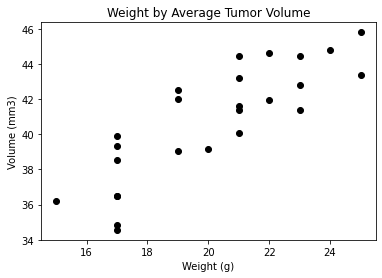

In [19]:
x=CapomouseID['Mouse_Weight']
y=CapomouseID['Mean_Tumor_Volume']

#plt.scatter would be better, but I keep getting a tuple error? 
plt.plot(x,y, marker='o', color='black', linewidth=0)
plt.title("Weight by Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Volume (mm3)")
plt.show()

## Correlation and Regression

In [45]:
# Calculate the correlation coefficient and linear regression model 

correlation =st.pearsonr(CapomouseID['Mouse_Weight'], CapomouseID['Mean_Tumor_Volume'])
print(f'r^2 = {correlation[0]}')
# for mouse weight and average tumor volume for the Capomulin regimen


r^2 = 0.8419363424694717


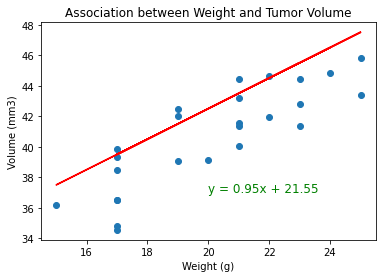

In [43]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regressionvals = x + slope + intercept
equation = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x,y)
plt.plot(x, regressionvals, "r-")
plt.annotate(equation,(20,37), fontsize=12, color="green")
plt.title("Association between Weight and Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Volume (mm3)")
plt.show()